# COMP 135 day03: Training Linear Regression Models via Analytical Formulas

# Objectives

* Learn how to apply the standard "least squares" formulas for 'training' linear regression in 1 dimension
* Learn how to apply the standard "least squares" formulas for 'training' linear regression in many dimensions (with matrix math)
* Learn how these formulas minimize *mean squared error*, but maybe not other error metrics


# Outline

* [Part 1: Simplest Linear Regression](#part1) with 1-dim features, estimate slope only
* * Exercise 1a: When does the formula fail?
* * Exercise 1b: Can you show graphically the formula minimizes mean squared error?
* * Exercise 1c: What would be optimal weight to minimize mean absolute error?
* [Part 2: Simple Linear Regression](#part2) with 1-dim features, slope and intercept
* [Part 3: General case of linear regression with F features](#part3)
* [Part 4: What is a matrix inverse?](#part4)
* [Part 5: When can we trust numerical computation of the inverse?](#part5)
* [Part 6: General case of linear regression with F features, using numerically stable formulas](#part6)



# Takeaways

* Exact formulas exist for estimating the weight coefficients $w$ and bias/intercept $b$ for linear regression
* * When $F=1$, just involves ratios of inner products
* * When $F>1$, requires matrix multiplication and other operations, solving a linear system with $F+1$ unknowns ($F$ weights and 1 bias)
* Prefer `np.linalg.solve` over `np.linalg.inv`.
* * Numerical methods for computing inverses (like `np.linalg.inv`) are unreliable if the matrix $A$ is almost singular.
* Linear algebra is a very important field of mathematics for understanding when a solution to a linear system of equations exists
* These formulas minimize *mean squared error*, but likely may not minimize other error metrics
* * Many ML methods are motivated by what is *mathematically convenient*.
* * In practice, you should *definitely* consider if another objective is better for your regression task
* * * Absolute error?

# Import libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import sklearn

In [3]:
# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

import seaborn as sns
sns.set('notebook', style='whitegrid', font_scale=1.25)

In [4]:
true_slope = 2.345

N = 7
x_N = np.linspace(-1, 1, N);
y_N = true_slope * x_N

prng = np.random.RandomState(33)
ynoise_N = y_N + 0.7 * prng.randn(N)

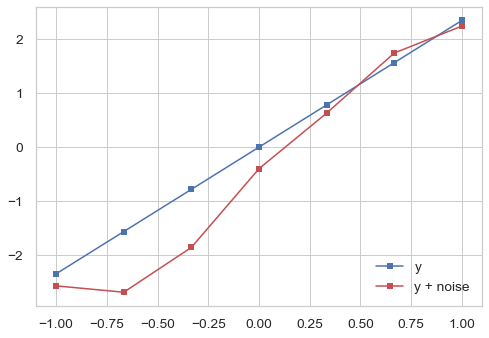

In [5]:
plt.plot(x_N, y_N, 'bs-', label='y')
plt.plot(x_N, ynoise_N, 'rs-', label='y + noise');
plt.legend(loc='lower right');

<a id="part1"></a>

# Part 1: Simplest Linear Regression with 1-dim features and only slope

Estimate slope only. We assume the bias/intercept is fixed to zero.

### Exact formula to estimate "least squares" solution w in 1D:

$$
w^* = \frac{\sum_n x_n y_n}{\sum_n x_n^2} = \frac{ \mathbf{x}^T \mathbf{y} }{ \mathbf{x}^T \mathbf{x} }
$$

### Estimate w using the 'true', noise-free y value

In [6]:
w_est = np.inner(x_N, y_N) / np.inner(x_N, x_N)
print(w_est)

2.3449999999999998


### Estimate w using the noisy y values

In [7]:
w_est = np.inner(x_N, ynoise_N) / np.inner(x_N, x_N)
print(w_est)

2.7606807490017067


# Exercise 1a: What if all examples had $x_n = 0$?

What would happen? What does the algebra of the formula suggest?

# Exercise 1b: Can you show graphically that this minimizes *mean squared error*?

In [8]:
def predict_1d(x_N, w):
    # TODO fix me
    return 0.0

In [9]:
def calc_mean_squared_error(yhat_N, y_N):
    # TODO fix me
    return 0.0

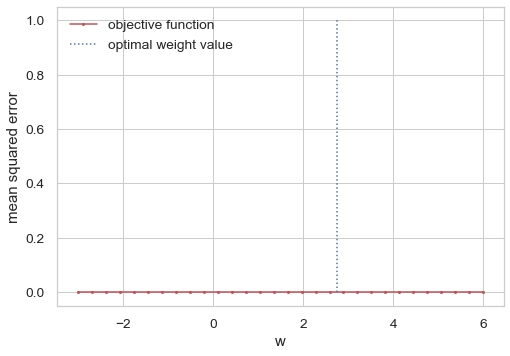

In [10]:
G = 30
w_candidates_G = np.linspace(-3, 6, G)
error_G = np.zeros(G)
for gg, w in enumerate(w_candidates_G):
    yhat_N = predict_1d(x_N, w)
    error_G[gg] = calc_mean_squared_error(yhat_N, ynoise_N)
plt.plot(w_candidates_G, error_G, 'r.-', label='objective function');
plt.plot(w_est * np.ones(2), np.asarray([0, 1]), 'b:', label='optimal weight value');
plt.xlabel('w');
plt.ylabel('mean squared error');
plt.legend()

# Exercise 1c: What about *mean absolute error*?

Does the least-squares estimate of $w$ minimize mean absolute error for this example?

In [11]:
def calc_mean_abs_error(yhat_N, y_N):
    # TODO fixme
    return 0.0
    

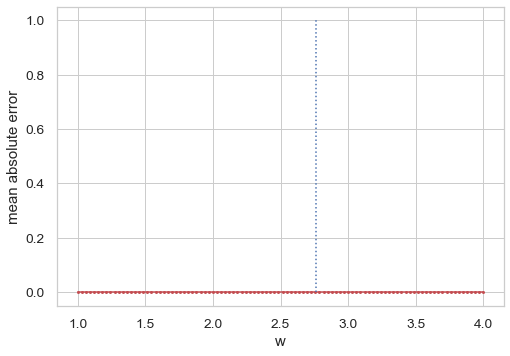

In [12]:
G = 100
w_candidates_G = np.linspace(1, 4, G)
error_G = np.zeros(G)
for gg, w in enumerate(w_candidates_G):
    yhat_N = predict_1d(x_N, w)
    error_G[gg] = calc_mean_abs_error(yhat_N, ynoise_N)
plt.plot(w_candidates_G, error_G, 'r.-', label='objective function');
plt.plot(w_est * np.ones(2), np.asarray([0, 1]), 'b:', label='optimal weight value');

plt.xlabel('w');
plt.ylabel('mean absolute error');

<a id="part2"></a>

# Part 2: Simpler Linear Regression with slope and bias

Goal: estimate slope $w$ and bias $b$

Then the best estimates of the slope and intercept are given by:

$$
w^* = \frac{ \sum_{n=1}^N (x_n - \bar{x}) (y_n - \bar{y}) }{\sum_{n=1}^N (x_n - \bar{x})^2 }
$$

and

$$
b^* = \bar{y} - w^* \bar{x}
$$


### Using the 'true', noise-free y value

Sanity check : we should recover the true-slope, with zero intercept

In [13]:
xbar = np.mean(x_N)
ybar = np.mean(y_N)
w_est = np.inner(x_N - xbar, y_N - ybar) / np.inner(x_N - xbar, x_N - xbar)
print(w_est)

b_est = ybar - w_est * xbar
print(b_est)

2.3449999999999998
-1.7938032012157886e-16


### Using the noisy y value

In [14]:
xbar = np.mean(x_N)
ybar = np.mean(ynoise_N)

w_est = np.inner(x_N - xbar, ynoise_N - ybar) / np.inner(x_N - xbar, x_N - xbar)
b_est = ybar - w_est * xbar

print("Estimated slope: " + str(w_est))
print("Estimated bias: " + str(b_est))

Estimated slope: 2.7606807490017067
Estimated bias: -0.4138756764186623


<a id="part3"></a>

# Part 3: General case of Linear Regression

Goal:
* estimate the vector $w \in \mathbb{R}^F$ of weight coefficients
* estimate the bias scalar $b$ (aka intercept)

Given a dataset of $N$ examples and $F$ feature dimensions, where

* $\tilde{\mathbf{X}}$ is an $N \times F +1$ matrix of feature vectors, where we'll assume the last column is all ones
* $\mathbf{y}$ is an $N \times 1$ column vector of outputs

Remember that the formula is:
    
$$
\theta^* = (\tilde{\mathbf{X}}^T \tilde{\mathbf{X}} )^{-1} \tilde{\mathbf{X}}^T \mathbf{y}
\\
~\\
w^* = [\theta^*_1 ~ \theta^*_2 \ldots \theta^*_F ]^T
\\
~\\
b^* = \theta^*_{F+1}
$$

We need to compute a *matrix inverse* to do this.

Let's try this out. Step by step.

First, print out the $\tilde{X}$ array

In [15]:
x_N1 = x_N[:,np.newaxis]

In [60]:
xtilde_N2 = np.hstack([x_N1, np.ones((x_N.size, 1))])
print(xtilde_N2)

[[-1.          1.        ]
 [-0.66666667  1.        ]
 [-0.33333333  1.        ]
 [ 0.          1.        ]
 [ 0.33333333  1.        ]
 [ 0.66666667  1.        ]
 [ 1.          1.        ]]


Next, print out the $y$ array

In [62]:
print(ynoise_N)

[-2.56819745 -2.68541972 -1.85631918 -0.39928063  0.62995686  1.74174534
  2.24038504]


Next, lets compute the matrix product $\tilde{X}^T \tilde{X}$, which is a $2 \times 2$ matrix

In [64]:
xTx_22 = np.dot(xtilde_N2.T, xtilde_N2)
print(xTx_22)

[[ 3.11111111e+00 -2.22044605e-16]
 [-2.22044605e-16  7.00000000e+00]]


Next, lets compute the INVERSE of $\tilde{X}^T \tilde{X}$, which is again a $2 \times 2$ matrix

In [65]:
inv_xTx_22 = np.linalg.inv(xTx_22) # compute the inverse!
print(inv_xTx_22)

[[3.21428571e-01 1.01959257e-17]
 [1.01959257e-17 1.42857143e-01]]


Next, let's compute the optimal $\theta$ vector according to our formula above

In [66]:
theta_G = np.dot(inv_xTx_22, np.dot(xtilde_N2.T, ynoise_N[:,np.newaxis])) # compute theta vector
print(theta_G)

[[ 2.76068075]
 [-0.41387568]]


In [67]:
print("Estimated slope: " + str(theta_G[0]))
print("Estimated bias: " + str(theta_G[1]))

Estimated slope: [2.76068075]
Estimated bias: [-0.41387568]


We should get the SAME results as in our simpler LR case in Part 2. 

So this formula for the general case looks super easy, right?

Not so fast...

Let's take a minute and review just what the heck an *inverse* is, before we just blindly implement this formula...

<a id="part4"></a>

# Part 4: Linear Algebra Review: What is the inverse of a matrix?

Let $A$ be a square matrix with shape $(D, D)$.

We say that matrix $A^{-1}$ is the *inverse* of $A$ if the product of $A$ and $A^{-1}$ yields the $D \times D$ *identity* matrix:

$$
A A^{-1} = I
$$

If $A^{-1}$ exists, it will also be a $D\times D $ square matrix.

In Python, we can compute the inverse of a matrix using `np.linalg.inv`

In [23]:
# Define a square matrix with shape(3,3)
A = np.diag(np.asarray([1., -2., 3.]))
print(A)

[[ 1.  0.  0.]
 [ 0. -2.  0.]
 [ 0.  0.  3.]]


In [24]:
# Compute its inverse
invA = np.linalg.inv(A)
print(invA)

[[ 1.          0.          0.        ]
 [-0.         -0.5        -0.        ]
 [ 0.          0.          0.33333333]]


In [25]:
np.dot(A, invA) # should equal identity

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Remember, in 1 dimensions, the inverse of $a$ is just $1/a$, since $a \cdot \frac{1}{a} = 1.0$

In [26]:
A = np.asarray([[2]])
print(A)

[[2]]


In [27]:
invA = np.linalg.inv(A)
print(invA)

[[0.5]]


## Does the inverse always exist?

No! Remember:

* Even when $D=1$, if $A=0$, then the inverse does not exist ($\frac{1}{A}$ is undefined)
* When $D \geq 2$, there are *infinitely many* square matrices $A$ that do not have an inverse



In [28]:
# Example 1:
A = np.asarray([[0, 0], [0, 1.337]])
print(A)
try:
    np.linalg.inv(A)
except Exception as e:
    print(str(type(e)) + ": " + str(e))

[[0.    0.   ]
 [0.    1.337]]
<class 'numpy.linalg.LinAlgError'>: Singular matrix


In [29]:
# Example 2:
A = np.asarray([[3.4, 3.4], [3.4, 3.4]])
print(A)
try:
    np.linalg.inv(A)
except Exception as e:
    print(str(type(e)) + ": " + str(e))

[[3.4 3.4]
 [3.4 3.4]]
<class 'numpy.linalg.LinAlgError'>: Singular matrix


In [30]:
# Example 3:
A = np.asarray([[-1.2, 4.7], [-2.4, 9.4]])
print(A)
try:
    np.linalg.inv(A)
except Exception as e:
    print(str(type(e)) + ": " + str(e))

[[-1.2  4.7]
 [-2.4  9.4]]
<class 'numpy.linalg.LinAlgError'>: Singular matrix


What do these examples have in common???

The columns of $A$ are not linearly independent!

In other words, $A$ is not invertible whenever we can exactly construct one column of $A$ by a linear combination of other columns

$$
A_{:,D} = c_1 A_{:,1} + c_2 A_{:,2} + \ldots c_{D-1} A_{:,D-1}
$$

where $c_1$, $c_2$, $\ldots c_{D-1}$ are scalar weights.

In [31]:
# Look, here's the first column:
A[:, 0]

array([-1.2, -2.4])

In [32]:
# And here's it being perfectly reconstructed by a scalar times the second column
A[:, 1] * -1.2/4.7

array([-1.2, -2.4])

In [33]:
# Example 3:
A = np.asarray([[1.0, 2.0, -3.0], [2, 4, -6.0], [1.0, 1.0, 1.0]])
print(A)
try:
    np.linalg.inv(A)
except Exception as e:
    print(str(type(e)) + ": " + str(e))

[[ 1.  2. -3.]
 [ 2.  4. -6.]
 [ 1.  1.  1.]]
<class 'numpy.linalg.LinAlgError'>: Singular matrix


### Important result from linear algebra: Invertible Matrix Theorem


Given a specific matrix $A$, the following statements are either *all* true or *all* false:

* $A$ has an inverse (e.g. a matrix $A^{-1}$ exists s.t. $A A^{-1} = I$)
* All $D$ columns of $A$ are linearly independent
* The columns of $A$ span the space $\mathbb{R}^D$
* $A$ has a non-zero determinant

For more implications, see the *Invertible Matrix Theorem*:

<https://en.wikipedia.org/wiki/Invertible_matrix#Properties>

<a id="part5"></a>

# Part 5: Is the numerical inverse reliable?

Can we always trust the results of `np.linalg.inv`?

Not really. Taking inverses is very tricky if the input matrix is not *very* well conditioned.

### A "good" example, where inverse works

In [34]:
# 3 indep rows of size 3.
x_NF = np.random.randn(3, 3)
xTx_FF = np.dot(x_NF.T, x_NF)

In [35]:
np.linalg.inv(np.dot(x_NF.T, x_NF))

array([[ 5.43270945, 12.90282235, -3.07602264],
       [12.90282235, 32.54599487, -8.12515637],
       [-3.07602264, -8.12515637,  2.41904465]])

In [36]:
# First, verify the `inv` function computes *something* of the right shape

inv_xTx_FF = np.linalg.inv(xTx_FF)
print(inv_xTx_FF)

[[ 5.43270945 12.90282235 -3.07602264]
 [12.90282235 32.54599487 -8.12515637]
 [-3.07602264 -8.12515637  2.41904465]]


In [37]:
# Next, verify the `inv` function result is ACTUALLY the inverse

ans_FF = np.dot(xTx_FF, inv_xTx_FF)

print(ans_FF)
print("\nis this close enough to identity matrix? " + str(
    np.allclose(ans_FF, np.eye(3))))

[[ 1.00000000e+00 -4.33114505e-16  3.73409184e-16]
 [ 3.94146478e-16  1.00000000e+00 -4.54028728e-16]
 [ 1.59364741e-16  8.07877021e-16  1.00000000e+00]]

is this close enough to identity matrix? True


### A *bad* example, where `np.linalg.inv` may be unreliable

In [38]:
# Only 2 indep rows of size 3. should NOT be invertible                      
# verify: determinant is close to zero                              
x_NF = np.random.randn(2, 3)  
xTx_FF = np.dot(x_NF.T, x_NF)

In [39]:
xTx_FF

array([[ 1.21324752, -0.03276769, -0.69721494],
       [-0.03276769,  1.99197506, -0.99101908],
       [-0.69721494, -0.99101908,  0.91284725]])

In [40]:
# First, verify the `inv` function computes *something* of the right shape

inv_xTx_FF = np.linalg.inv(xTx_FF)
print(inv_xTx_FF)

[[5.11537121e+15 4.40955766e+15 8.69419178e+15]
 [4.40955766e+15 3.80113152e+15 7.49457632e+15]
 [8.69419178e+15 7.49457632e+15 1.47768300e+16]]


In [41]:
# Next, verify the `inv` function result is ACTUALLY the inverse

ans_FF = np.dot(xTx_FF, inv_xTx_FF)

print(ans_FF)
print("\nis this close enough to identity matrix? " + str(
    np.allclose(ans_FF, np.eye(3))))

[[ 1.4520932   0.49807897 -0.24114104]
 [-0.20159063 -0.27703514 -1.15131685]
 [-1.53776313 -0.71804165 -0.59193815]]

is this close enough to identity matrix? False


### What just happened?

We just asked for an inverse.

NumPy gave us a result that WAS NOT AN INVERSE, but we received NO WARNINGS OR ERRORS!

So what should we do? Avoid naively calling `np.linalg.inv` and trusting the result. 

A better thing to do is use `np.linalg.solve`, as this will be more *stable* (trustworthy).

<https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html>

What `np.linalg.solve(A, b)` does is that it uses DIFFERENT algorithm to directly return an answer to the question

What vector $\theta$ would be a valid solution to the equation

$$
A \theta = b
$$

for some matrix $A$ and vector $b$

So for our case, we are requesting a solution (a specific vector $\theta$) to the equation

$$
\tilde{X}^T \tilde{X} \theta = \tilde{X}^T y
$$

<a id="part6"></a>

# Part 6: Returning to general case linear regression

Construct a simple case with $N=2$ examples and $F=2$ features.

For general linear regression, this is an UNDER-determined system (we have 3 unknowns, but only 2 examples).



In [70]:
true_w_F1 = np.asarray([1.0, 1.0])[:,np.newaxis]
true_b = np.asarray([0.0])

In [71]:
x_NF = np.asarray([[1.0, 2.0], [1.0, 1.0]]) + np.random.randn(2,2) * 0.001
print(x_NF)

[[1.00145395 1.99803269]
 [1.00010652 0.99984927]]


In [72]:
y_N1 = np.dot(x_NF, true_w_F1) + true_b
print(y_N1)

[[2.99948664]
 [1.9999558 ]]


Punchline: there should be INFINITELY many weights $w$ and bias values $b$ that can reconstruct our $y$ **perfectly**

Question: Can various estimation strategies find such weights?

### Try out sklearn


In [73]:
import sklearn.linear_model

In [74]:
lr = sklearn.linear_model.LinearRegression()

In [75]:
lr.fit(x_NF, y_N1)

LinearRegression()

Print the estimated weights $w$ and intercept $b$

In [76]:
print(lr.coef_)
print(lr.intercept_)

[[0.0013517  1.00134805]]
[0.99740683]


Print the predicted values for $y$, alongside the *true* ones

In [77]:
print("Results for sklearn")
print("Predicted y: " + str(np.squeeze(lr.predict(x_NF))))
print("True y:      " + str(np.squeeze(y_N1)))

Results for sklearn
Predicted y: [2.99948664 1.9999558 ]
True y:      [2.99948664 1.9999558 ]


### Prep for our formulas: make the $\tilde{\mathbf{X}}$ array

Will have shape $N \times (F+1)$

Let's define $G = F+1$

In [78]:
xtilde_NG = np.hstack([x_NF, np.ones((2, 1))])
print(xtilde_NG)

[[1.00145395 1.99803269 1.        ]
 [1.00010652 0.99984927 1.        ]]


In [79]:
xTx_GG = np.dot(xtilde_NG.T, xtilde_NG)

### Try out using our least-squares formula, as implemented with `np.linalg.inv`

In [80]:
inv_xTx_GG = np.linalg.inv(xTx_GG)
theta_G1 = np.dot(inv_xTx_GG, np.dot(xtilde_NG.T, y_N1))

Best estimate of the weights and bias (after "unpacking" the vector $\theta$):

In [81]:
w_F = theta_G1[:-1, 0]
b = theta_G1[-1]
print(w_F)
print(b)

[0. 1.]
[0.]


In [82]:
yhat_N1 = np.dot(xtilde_NG, theta_G1)

In [83]:
print("Results for using naive np.linalg.inv")
print("Predicted y: " + str(yhat_N1[:,0]))
print("True y:      " + str(y_N1[:,0]))

Results for using naive np.linalg.inv
Predicted y: [1.99803269 0.99984927]
True y:      [2.99948664 1.9999558 ]


Expected result: you should see that predictions might be *quite far* from true y values!

### Try out using our formulas, as implemented with `np.linalg.solve`

What should happen: We can find estimated parameters $w, b$ that perfectly predict the $y$

In [84]:
theta_G1 = np.linalg.solve(xTx_GG, np.dot(xtilde_NG.T, y_N1))

In [85]:
w_F = theta_G1[:-1,0]
b = theta_G1[-1,0]
print(w_F)
print(b)

[0.51859823 1.00064983]
0.48080331139358556


In [86]:
yhat_N1 = np.dot(xtilde_NG, theta_G1)

In [87]:
print("Results for using more stable formula implementation with np.linalg.solve")
print("Predicted y: " + str(yhat_N1[:,0]))
print("True y:      " + str(y_N1[:,0]))

Results for using more stable formula implementation with np.linalg.solve
Predicted y: [2.99948664 1.9999558 ]
True y:      [2.99948664 1.9999558 ]
